# Importing important libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor , export_graphviz , plot_tree
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder

# Decision Tree Regression
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

1. Discrete output example: A weather prediction model that predicts whether or not there’ll be rain in a particular day.
1. Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

In [2]:
df = pd.read_csv(r'Datasets/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

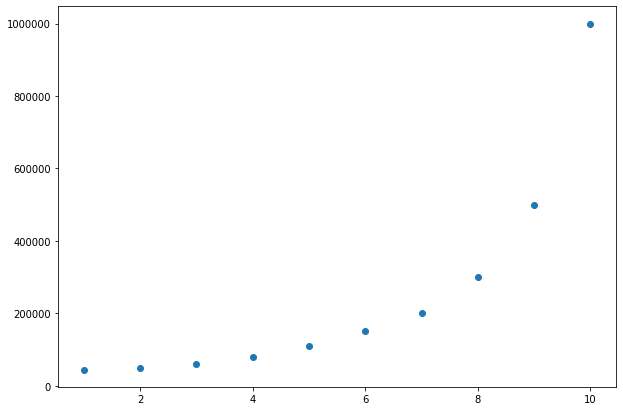

In [6]:
plt.figure(figsize =(10 , 7))
plt.scatter(df.Level , df.Salary)

In [7]:
X = df.iloc[: , 1:2].values
y = df.iloc[: ,2].values

In [8]:
clf = DecisionTreeRegressor()
clf.fit(X , y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [9]:
clf.predict([[7]])

array([200000.])

In [10]:
x_grid = np.arange(min(X),max(X) , 0.001)
x_grid = x_grid.reshape(len(x_grid) , 1)
x_grid

array([[1.   ],
       [1.001],
       [1.002],
       ...,
       [9.997],
       [9.998],
       [9.999]])

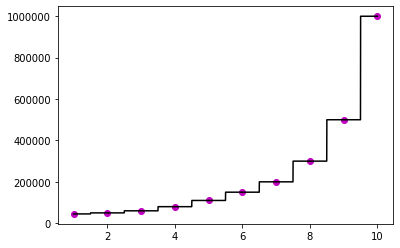

In [11]:
plt.scatter(X , y ,color= 'm')
plt.plot(x_grid , clf.predict(x_grid) ,'k')

In [12]:
clf.score(X,y) * 100 

100.0

In [16]:
export_graphviz(clf , out_file='tree.dot')

!['tree'](tree.png)

[Text(784.6875, 1009.5428571428572, 'X[0] <= 8.5\nmse = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(592.875, 854.2285714285715, 'X[0] <= 6.5\nmse = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(418.5, 698.9142857142858, 'X[0] <= 4.5\nmse = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(279.0, 543.6, 'X[0] <= 3.5\nmse = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(209.25, 388.28571428571433, 'X[0] <= 2.5\nmse = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(139.5, 232.97142857142865, 'X[0] <= 1.5\nmse = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(69.75, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(209.25, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(279.0, 232.97142857142865, 'mse = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(348.75, 388.28571428571433, 'mse = 0.0\nsamples = 1\nvalue = 80000.0'),
 Text(558.0, 543.6, 'X[0] <= 5.5\nmse = 400000000.0\nsamples = 2\nvalue = 130000.0'),
 Text(488.25, 388.2

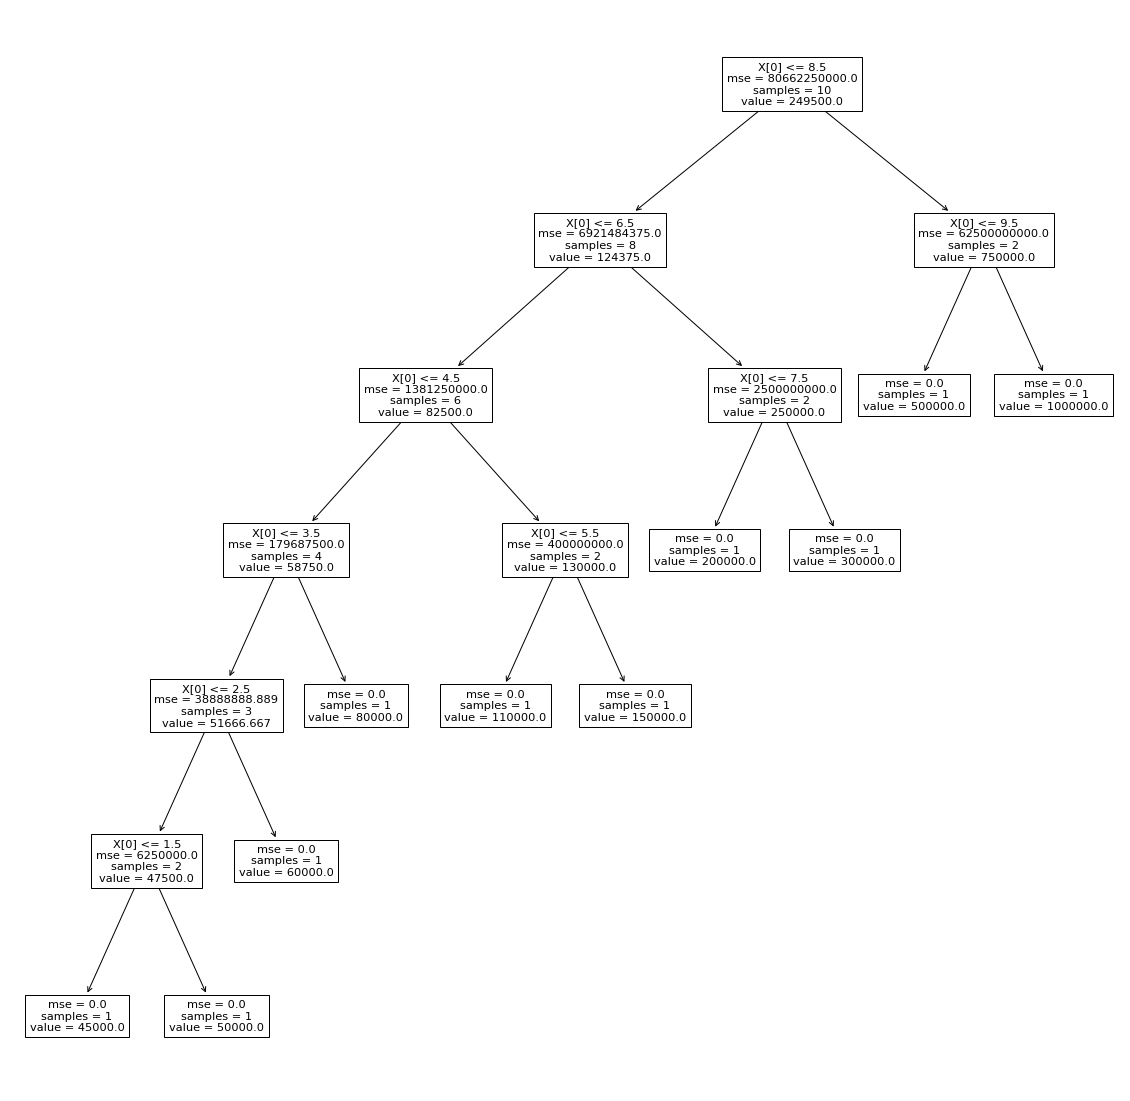

In [21]:
plt.figure(figsize=(20,20))
plot_tree(clf)

# Decision Tree Classifier

In [22]:
df1 = pd.read_csv(r'Datasets/salaries.csv')
df1.sample(6)

,company,job,degree,salary_more_then_10lac
1,google,sales executive,masters,0
15,facebook,computer programmer,masters,1
11,facebook,sales executive,masters,1
2,google,business manager,bachelors,1
13,facebook,business manager,masters,1
9,abc pharma,business manager,masters,1


In [23]:
df1.columns

Index(['company', 'job', 'degree', 'salary_more_then_10lac'], dtype='object')

In [24]:
encoder = LabelEncoder()
df1.company = encoder.fit_transform(df1.company)
df1.job = encoder.fit_transform(df1.job)
df1.degree = encoder.fit_transform(df1.degree)

In [25]:
df1

,company,job,degree,salary_more_then_10lac
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


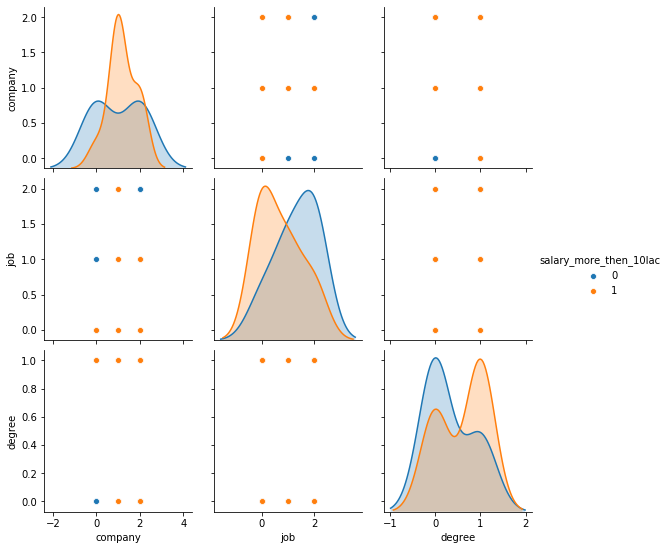

In [26]:
sns.pairplot(df1 , hue='salary_more_then_10lac')

In [27]:
X1 = df1.drop(['salary_more_then_10lac'] , axis = 1)
y1 = df1['salary_more_then_10lac']

In [28]:
reg = DecisionTreeClassifier()
reg.fit(X1 , y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
reg.predict([[3,3,0]])

array([0])

[Text(465.0, 996.6, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(279.0, 815.4000000000001, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(186.0, 634.2, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(372.0, 634.2, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(651.0, 815.4000000000001, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(558.0, 634.2, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(744.0, 634.2, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(651.0, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(837.0, 453.0, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(744.0, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(930.0, 271.79999999999995, 'X[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(837.0, 90.5

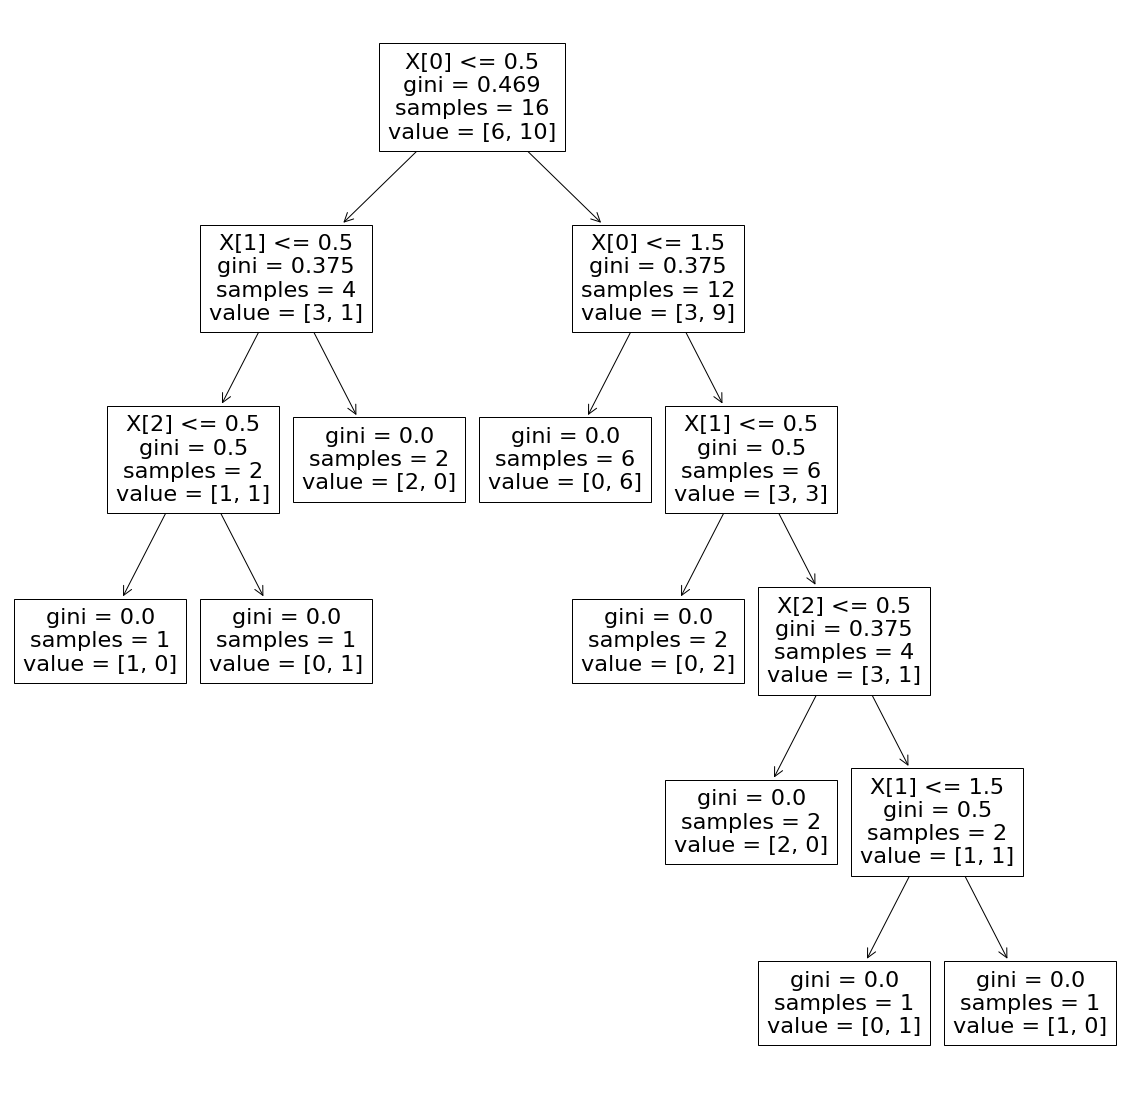

In [33]:
plt.figure(figsize=(20,20))
plot_tree(reg)

In [31]:
export_graphviz(reg , out_file='classification.dot')


![](classificationTree.png)